# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

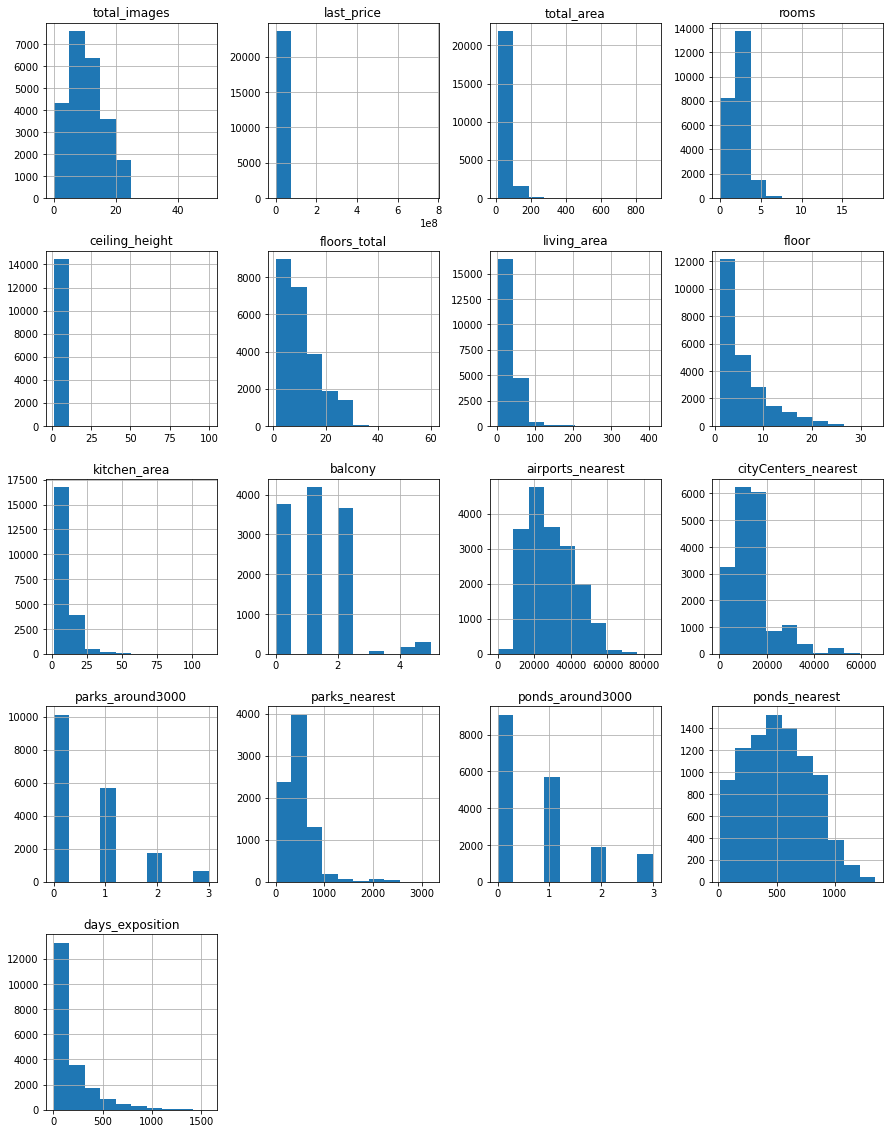

In [5]:
data.hist(figsize=(15, 20));

#### Подвывод 

Почти во всех столбцах есть пропущенные знения, однако совсем много пропусков в столбце "ceiling_height","balcony" (почти половина пустых), parks_nearest(только треть не пустых), is_apartment(всего 10 процентов данных не пустых)

Есть нееврный тип данных в столбцах, нужно будет поменять first_day_exposition(object в data), floors_total(float64 в int), is_apartment(object в bool), balcony (float64 в int)

Судя по гистограммам в "last_price" и "ceiling_height" есть проблемы с данными, вероятно много выбросов которые мешают корректно отобразиться данным на гистограммаме.

### Предобработка данных

#### Найдем и заменим пропущенные значения

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Самое большое количество пропусков в столбцах "parks_nearest" — расстояние до ближайшего парка (м) и "ponds_nearest" — расстояние до ближайшего водоёма (м).


Заменять их числовыми значениями кажется бессмысленным. То же самое относится к названию населённого пункта ('locality_name') и числу водоёмов и парков в радиусе 3 км ('parks_around3000', 'ponds_around3000').

Можно заменить все пропуски в столбце 'is_apartment' на значение False. Если продавец не указал, что квартира относится к типу апартаменты, то, скорее всего, это обычная квартира.

То же самое можно сделать с количеством балконов ('balcony'). Если продавец не указал наличие балкона, будем считать, что его нет.

Высоту потолков, размер жилой площади и размер кухни ('ceiling_height', 'living_area', 'kitchen_area') можно заменить на среднее значение.

Кажется, все поля, содержащие пропуски, не являются критичными при выставлении объявления о продаже квартиры. Вероятно, продавцы просто не посчитали нужным указать эти значения.

In [7]:
# Заменяем значения NaN на False в столбце "is_apartment"
data['is_apartment'] = data['is_apartment'].fillna(False)

# Проверяем наличие пропусков в столбце "is_apartment"
data['is_apartment'].isna().sum()

0

In [8]:
data['is_apartment'].unique()

array([False,  True])

In [9]:
data['is_apartment'].dtype

dtype('bool')

Заметим, что столбец 'is_apartment' стал из типа 'object' типом 'bool'

In [10]:
# Заменяем значения NaN на нули в столбце 'balcony'
data['balcony'] = data['balcony'].fillna(0)

# Проверяем наличие пропусков в столбце 'balcony'
data['balcony'].isna().sum()


0

Прежде, чем менять значения на среднее в столбцах, познакомимся с ними поближе и устраним аномальные значения.

In [11]:
# Просматриваем распределение значений в столбце 'ceiling_height'
value_counts = data['ceiling_height'].value_counts().sort_index()

# Выводим результат
print(value_counts)

1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: ceiling_height, Length: 183, dtype: int64


Высота потолка в сто метров впечатляет!

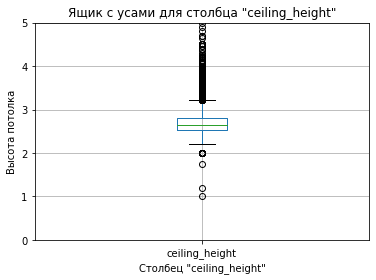

In [12]:
import matplotlib.pyplot as plt

# Построение ящика с усами для столбца 'ceiling_height'
data.boxplot(column='ceiling_height')

# устанавливаем верхнюю границу графика чтобы не видеть выбросы, 
# иначе они сильно искажают график
plt.ylim(0, 5)

# Настройки графика
plt.xlabel('Столбец "ceiling_height"')
plt.ylabel('Высота потолка')
plt.title('Ящик с усами для столбца "ceiling_height"')

# Отображение графика
plt.show()

Видим множество выбросов выше 3.25 и ниже 2.25. Будем считать, что никто не живет в квартирах с потолком ниже 2 метров и выше 6 метров (высота потолков в Зимнем дворце Эрмитажа). 

Также в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Напишем функцию, которая меняет значения в диапазоне 20 - 35 м на порядок меньше.

In [13]:
# Функция уменьшает размер аномальных потолков
def ceiling_height_deviding(column):
    adjusted_column = []
    for height in column:
        if 20 <= height <= 35:
            adjusted_column.append(height / 10)
        else:
            adjusted_column.append(height)
    return adjusted_column

# Применение функции и запись в столбец
data['ceiling_height'] = ceiling_height_deviding(data['ceiling_height'])

Напишем функцию, которая меняет потолки выше шести метров и ниже двух на медиану

In [14]:
# Функция, которая меняет анимальные значения потолков на медиану
def median_ceiling_height(column):
    adjusted_column = []
    median_height = column.median()
    
    for height in column:
        if height > 6 or height < 2:
            adjusted_column.append(median_height)
        else:
            adjusted_column.append(height)
    
    return adjusted_column

# Применение функции и запись в столбец
data['ceiling_height'] = median_ceiling_height(data['ceiling_height'])

Строим график заново чтобы посмотреть, что все прошло как задумано

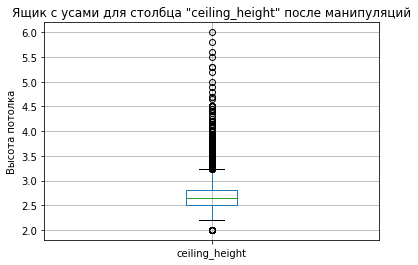

In [15]:
import matplotlib.pyplot as plt

# Построение ящика с усами для столбца 'ceiling_height'
ax = data.boxplot(column='ceiling_height')

# Настройки графика
plt.ylabel('Высота потолка')
plt.title('Ящик с усами для столбца "ceiling_height" после манипуляций')

# Отображение графика
plt.show()

Знакомство со столбцом размера кухни ('living_area') и замена NaN на среднюю 

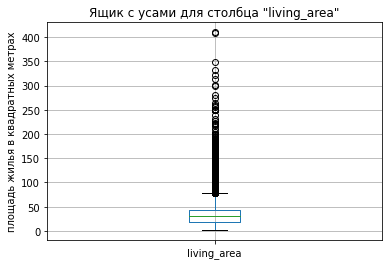

In [16]:
import matplotlib.pyplot as plt

# Построение ящика с усами для столбца 'living_area'
ax = data.boxplot(column='living_area')

# Настройки графика
plt.ylabel('площадь жилья в квадратных метрах')
plt.title('Ящик с усами для столбца "living_area"')

# Отображение графика
plt.show()

Поскольку значения размера жилой площади не могут быть больше общей площади квартиры, создадим функцию которая меняет значения Nan в столбце 'living_area' на среднее для такого значения 'total_area'

In [17]:
# создадим доп столбец со средними значениями 'kitchen_area'
# в зависимости от группы 'total_area'
data['mean_living_area'] = (data.groupby('total_area')['living_area']
                            .transform('mean')
                           )

In [18]:
# Список столбцов, которые нужно отобразить
columns_to_show = ['total_area','living_area','mean_living_area']

# Отображение только выбранных столбцов
df_selected = data[columns_to_show]

# Отображение DataFrame с выбранными столбцами
display(df_selected.head(30))

,total_area,living_area,mean_living_area
0,108.00,51.00,61.524000
1,40.40,18.60,18.737143
2,56.00,34.30,34.222680
3,159.00,NaN,80.200000
4,100.00,32.00,55.935385
5,30.40,14.40,16.596522
6,37.30,10.60,16.116250
7,71.60,NaN,42.771429
8,33.16,15.43,15.430000
9,61.00,43.60,38.075659


Результат работы функции похож на правду

In [19]:
# Функция, которая заполнит NaN средним из столбца 'mean_living_area'
def replace_nan_with_mean(data):
    data['living_area'].fillna(data['mean_living_area'], inplace=True)
    return data

# Применение функции
data = replace_nan_with_mean(data)

In [20]:
data['living_area'].isna().sum()

143

Если для некоторых уникальных значений при группировке 'total_area' в столбце 'living_area' нет значений (нет ни одного наблюдения), то среднее значение для этих уникальных значений будет NaN. Так или иначе, пустых значений было 1903, стало всего 143. Таким образом мы устранили 1760 пустых значений.

Сделаем тоже для размеров кухни.

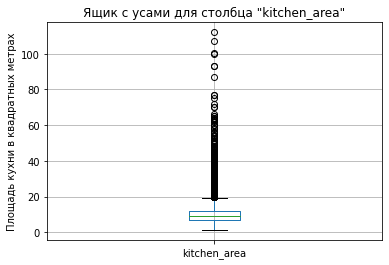

In [21]:
import matplotlib.pyplot as plt

# Построение ящика с усами для столбца 'kitchen_area'
data.boxplot(column='kitchen_area')

# Настройки графика
plt.ylabel('Площадь кухни в квадратных метрах')
plt.title('Ящик с усами для столбца "kitchen_area"')

# Отображение графика
plt.show()

Поскольку значения размера кухни не могут быть больше общей площади квартиры, создадим функцию которая меняет значения Nan в столбце 'kitchen_area' на среднее для такого значения total_area

In [22]:
# создадим доп столбец со средними значениями 'kitchen_area' 
# в зависимости от группы 'total_area'
data['mean_kitchen_area'] = (
    data.groupby('total_area')['kitchen_area']
    .transform('mean')
)

Посмотрим насколько похожи настоящие значения размера кухни и рассчетные

In [23]:
# Список столбцов, которые нужно отобразить
columns_to_show = ['total_area','kitchen_area','mean_kitchen_area']

# Отображение только выбранных столбцов
df_selected = data[columns_to_show]

# Отображение DataFrame с выбранными столбцами
display(df_selected.head(30))

,total_area,kitchen_area,mean_kitchen_area
0,108.00,25.00,16.953846
1,40.40,11.00,10.765185
2,56.00,8.30,8.830464
3,159.00,NaN,16.100000
4,100.00,41.00,17.300000
5,30.40,9.10,6.560870
6,37.30,14.40,10.140625
7,71.60,18.90,11.006667
8,33.16,8.81,8.810000
9,61.00,6.50,9.042033


In [24]:
# Функция, котоая делает замена NaN на медиану
def replace_nan_with_mean(data):
    data['kitchen_area'].fillna(data['mean_kitchen_area'], inplace=True)
    return data

# Примененеие функции
data = replace_nan_with_mean(data)

In [25]:
data['mean_kitchen_area'].isna().sum()

205

In [26]:
data['kitchen_area'].isna().sum()

205

Аналогичная ситуация с жилой площадью. Если для уникальных значений 'total_area' в столбце 'kitchen_area' нет значений, то среднее значение для этих уникальных значений будет NaN.

Посмотрим, что нужно ли что-то сделать с ценой обьекта ('last_price')

(0.0, 15300000.0)

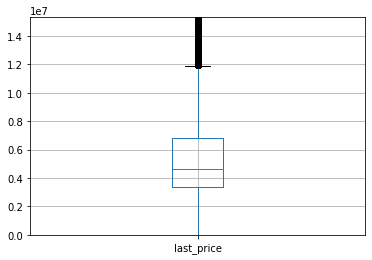

In [27]:
# Строим ящик с усами
ax = data.boxplot(column= 'last_price')

# Содержится большое количесвто выбросов, 
# ограничим интревал видимости до 95 персентили
ax.set_ylim(0, data['last_price'].quantile(0.95))

Посмотрим на выбросы, сколько их, и в каких районах обнаруживается аномально дорогое жилье

In [28]:
high_price = data[data['last_price'] > 15300000]

print(high_price['last_price'].count())

1182


In [29]:

print(high_price['locality_name'].value_counts())

Санкт-Петербург     1142
Пушкин                18
Сестрорецк             5
посёлок Стрельна       2
Петергоф               2
Зеленогорск            2
посёлок Репино         1
Колпино                1
Всеволожск             1
Кронштадт              1
Выборг                 1
Красное Село           1
деревня Бор            1
Name: locality_name, dtype: int64


Похоже, что все таки, это не аномалии, а просто выбросы. Просто в Санкт-Петербурге дорогие квартиры!

Поработаем со столбцом "floors_total", познакомимся, заменим NaN, изменим тип с float на int.

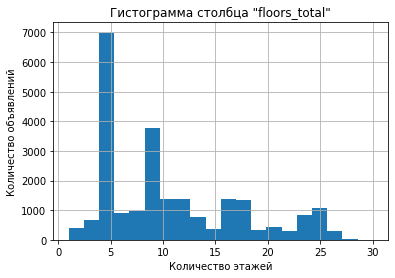

In [30]:
data['floors_total'].hist(bins = 20, range = (1,30))

# Настройки графика
plt.xlabel('Количество этажей')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма столбца "floors_total"')

# Отображение графика
plt.show()

In [31]:
# Просматриваем распределение значений в столбце 'floors_total'
value_counts = data['floors_total'].value_counts().sort_index()

# Выводим результат
print(value_counts)

1.0       25
2.0      383
3.0      668
4.0     1200
5.0     5788
6.0      914
7.0      592
8.0      390
9.0     3761
10.0    1174
11.0     203
12.0    1362
13.0     229
14.0     553
15.0     365
16.0    1376
17.0     833
18.0     505
19.0     339
20.0     271
21.0     158
22.0     286
23.0     352
24.0     469
25.0    1075
26.0     124
27.0     164
28.0      21
29.0       1
33.0       1
34.0       1
35.0      24
36.0       3
37.0       1
52.0       1
60.0       1
Name: floors_total, dtype: int64


Обнаруживаются наиболее частые значения общего количества этажей в доме. Это 5, 9, 12, 16, 25

Интересно, нет ли зависимоти Nan от этажа. Например, жители первых этажей ленятся указывать?

In [32]:
import numpy as np

# посмотрим какие значения принимает 'floor' в тех строках,
# где 'floors_total' = Nan
unique_floor_values = data.loc[data['floors_total'].isnull(), 'floor'].unique()

print(np.sort(unique_floor_values))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24]


Нет, похоже такой зависимости нет. Тогда заполним пропуски сами. 

Поскольку значения всего этажей в доме не может быть меньше, чем этаж на котором сдается квартира, напишем функцию, которая выдает значения floors_total взамен Nan на этаж наиболее близкий среди наиболее распространенных этажей. 

In [33]:
# Напишем функцию, которая выдает значения floors_total взамен Nan на этаж
def Nan_replace_floors_total(floor, floors_total):
    new_floors_total = []
    
    for i in range(len(floor)):
        if pd.isnull(floors_total[i]):
            if floor[i] < 5:
                new_floors_total.append(floor[i])
            elif 5 <= floor[i] <= 9:
                new_floors_total.append(9)
            elif 9 <= floor[i] <= 12:
                new_floors_total.append(12)
            elif 12 <= floor[i] <= 16:
                new_floors_total.append(16)
            elif 16 <= floor[i] <= 25:
                new_floors_total.append(25)
            else:
                new_floors_total.append(np.nan)
        else:
            new_floors_total.append(floors_total[i])
    
    return new_floors_total

# Применение функции
data['floors_total'] = Nan_replace_floors_total(data['floor'], data['floors_total'])

In [34]:
# Замена типа столбца 'floors_total' на int с помощью метода astype()
data['floors_total'] = data['floors_total'].astype(int)

In [35]:
data['floors_total'].isna().sum()

0

А есть ли еще такие аномальные значения в таблице, когда жилая площадь больше общей, или размер кухни больше жилой площади? Напишем функцию которая посчитает такие строки.

In [36]:
def find_anomalies(df):
    anomalies = ((df['kitchen_area'] > df['living_area']).sum() +
             (df['living_area'] > df['total_area']).sum())
    
    return anomalies

# Использование функции
anomalies = find_anomalies(data)
if anomalies:
    print("Количество обнаруженных аномалий:",anomalies)
else:
    print("Нет аномальных значений")

Количество обнаруженных аномалий: 365


Обнаружилось 365 таких странных строк. Не до конца понятно, как исправить эти значения. Их можно либо удалить, либо просто принять к сведению, все таки их не так много. 

#### Посмотреть какие типы данных в столбцах, изменить если требуется

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23556 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23494 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Многие типы данных изменились в процессе удаления пропусков, но есть еще время и дата публикации, которые можно преобразовать с типа "строк" в родной тип "datetime", а также количество балконов поменяем c "float" на "int"(врядли может быть дробным)

In [38]:
# Преобразование столбца в тип datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [39]:
# Изменяем тип столбца "balcony" на int
data['balcony'] = data['balcony'].astype(int)

#### Устраним не явные дубликаты столбца с названиями населенных пунктов ('locality_name')

In [40]:
# Заменим NaN на 'unknown', и выведем список уникальных значений
data['locality_name'] = data['locality_name'].fillna('unknown')
print(sorted(data['locality_name'].unique()))

['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', 'городской поселок Большая Ижора', 'городской поселок Янино-1', 'городской посёлок Будогощь', 'городской посёлок Виллози', 'городской посёлок Лесогорский', 'городской посёлок Мга', 'городской посёлок Назия', 'городской посёлок Новоселье', 'городской посёлок Павлово', 'городской посёлок Рощино', 'городской посёлок Свирьстрой', 'городской посёлок Советский', 'городской посёлок Фёдоровское', 'городской посёлок Янино-1', 'деревня Агалатово', 'де

In [41]:
# посчитаем количество уникальных значений
print(len(data['locality_name'].unique()))

365


Всего значений уникальных значений 365, но есть неявные дубликаты. Напишем функцию, которая заменит 'поселок городского типа', 'посёлок городского типа','посёлок' и 'городской поселок' на просто 'поселок' в целях единообразия, и новые имена запишем в новый столбец

In [42]:
def replace_locality_name(string):
    if 'поселок городского типа' in string:
        string = string.replace('поселок городского типа', 'поселок')
    elif 'посёлок городского типа' in string:
        string = string.replace('посёлок городского типа', 'поселок')
    elif 'посёлок' in string:
        string = string.replace('посёлок', 'поселок')
    elif 'городской поселок' in string:
        string = string.replace('городской поселок', 'поселок')
    return string

data['new_locality_name'] = data['locality_name'].apply(replace_locality_name)

In [43]:
# Выведем новый список названий после применения функции
print(sorted(data['new_locality_name'].unique()))

['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', 'городской поселок Будогощь', 'городской поселок Виллози', 'городской поселок Лесогорский', 'городской поселок Мга', 'городской поселок Назия', 'городской поселок Новоселье', 'городской поселок Павлово', 'городской поселок Рощино', 'городской поселок Свирьстрой', 'городской поселок Советский', 'городской поселок Фёдоровское', 'городской поселок Янино-1', 'деревня Агалатово', 'деревня Аро', 'деревня Батово', 'деревня Бегуницы', 'деревня Белог

In [44]:
# Количество уникальных значений после применения функции
print(len(data['new_locality_name'].unique()))

330


Из 365 значений стало 330 штук. Нам удалось убрать 35 неявных дубликатов

#### Избавимся от выбросов в стоимости квартир 'last_price' 

Попробуем посмотреть глазами на данные из столбца.

In [45]:
# Просматриваем распределение значений в столбце last_price
value_counts = data['last_price'].value_counts(dropna=False).sort_index()

# Выводим результат
print(value_counts)

12190.0        1
430000.0       2
440000.0       1
450000.0       4
470000.0       3
              ..
300000000.0    1
330000000.0    1
401300000.0    1
420000000.0    1
763000000.0    1
Name: last_price, Length: 2978, dtype: int64


Стоит удалить самое маленькое и самое большое значение 

In [46]:
data.drop(data['last_price'].idxmin(), inplace=True)
data.drop(data['last_price'].idxmax(), inplace=True)

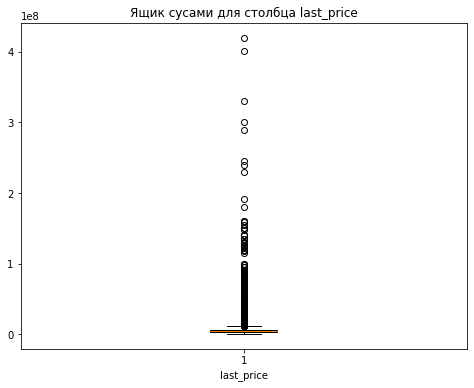

In [47]:
# Построение ящика с усами

# Устанавливаем размер графика
plt.figure(figsize=(8, 6)) 

plt.boxplot(data['last_price'])

# Настроиваем заголовок графика и название оси x
plt.title('Ящик сусами для столбца last_price')  # Заголовок графика
plt.xlabel('last_price')  

plt.show()

В данных очень много выбросов сверху, можно попробовать удалить значения выше 99 перцентили

In [48]:
# Определение верхнего порога для удаления выбросов
outlier_threshold = data['last_price'].quantile(0.99)

# Удаление выбросов из столбца 'last_price' и запись в 
filtered_data = len(data[data['last_price'] <= outlier_threshold])

# Вывод информации о новом наборе данных
print("Исходное количество строк:", len(data['last_price']))
print("Количество строк после удаления выбросов:", filtered_data)

Исходное количество строк: 23697
Количество строк после удаления выбросов: 23462


Удалим около 236 значений можно удалить. Посмотрим как будет выглядеть график.

In [49]:
data = data[data['last_price'] <= data['last_price'].quantile(0.99)]

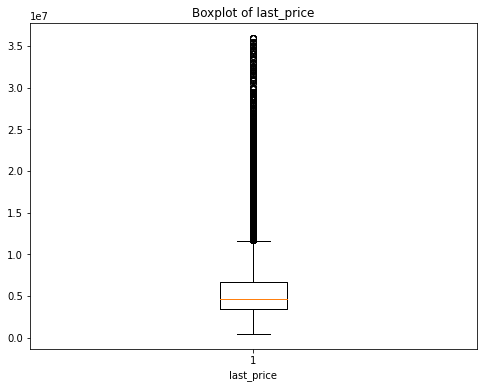

In [50]:
# Построение боксплота после манипуляций с данными
plt.figure(figsize=(8, 6))  # Размер графика 

plt.boxplot(data['last_price'])


plt.title('Boxplot of last_price')  # Заголовок графика
plt.xlabel('last_price')  # Название оси x

plt.show()

Выбросов все еще много, но пожалуй, но больше идей нет. оставлю так 😐

#### Избавимся от выбросов в количестве комнат 'rooms' 

In [51]:
# Просматриваем распределение значений в столбце rooms
value_counts = data['rooms'].value_counts(dropna=False).sort_index()

# Выводим результат
print(value_counts)

0      196
1     8044
2     7923
3     5746
4     1123
5      282
6       84
7       42
8        8
9        6
10       2
11       2
14       2
16       1
19       1
Name: rooms, dtype: int64


In [52]:
# количество строк в исходной таблице.
room_count_old = data.shape[0]

# считаем количество строк в отфильтрованной таблице с помощью shape
room_count_new = data[data['rooms'] <= 10].shape[0]

# вычисляем соотношение между room_count_new и room_count_old,
# чтобы определить, какая часть строк будет удалена
print(room_count_new/room_count_old)

0.9997442673258887


Решаю удалить из рассмотрения строки с недвижимостю, у которых больше 10 комнат.

In [53]:
data = data[data['rooms'] <= 10]

#### Избавимся от выбросов в столбце c общей площадью 'total_area'

In [54]:
# Просматриваем распределение значений в столбце rooms
value_counts = data['total_area'].value_counts(dropna=False).sort_index()

# Выводим результат
print(value_counts)

12.00     1
13.00     3
13.20     1
14.00     1
15.00     2
         ..
380.00    1
422.20    1
441.98    1
460.80    1
470.30    1
Name: total_area, Length: 2081, dtype: int64


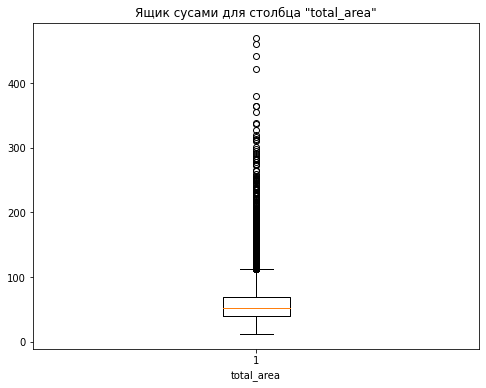

In [55]:
# Построение ящика с усами
plt.figure(figsize=(8, 6))  # Размер графика

plt.boxplot(data['total_area'])

plt.title('Ящик сусами для столбца "total_area"')  # Заголовок графика
plt.xlabel('total_area')  # Название оси x

plt.show()

Попробуем сделать с общей площадью тоже самое, что и с ценой объектов. Оставим 99 перцентиль.

In [56]:
data = data[data['total_area'] <= data['total_area'].quantile(0.99)]

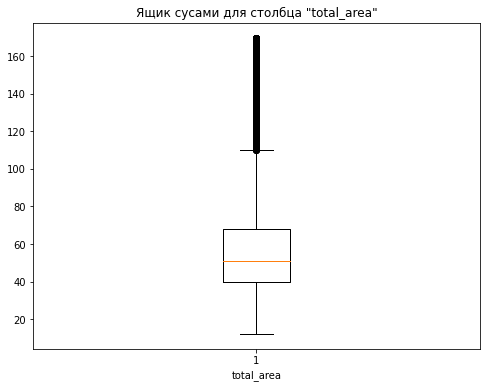

In [57]:
# Построение ящика с усами после фильтрации данных
plt.figure(figsize=(8, 6))  # Размер графика

plt.boxplot(data['total_area'])

plt.title('Ящик сусами для столбца "total_area"')  # Заголовок графика
plt.xlabel('total_area')  # Название оси x

plt.show()

Стало получше, оставлю так. 

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23234 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23234 non-null  int64         
 1   last_price            23234 non-null  float64       
 2   total_area            23234 non-null  float64       
 3   first_day_exposition  23234 non-null  datetime64[ns]
 4   rooms                 23234 non-null  int64         
 5   ceiling_height        14196 non-null  float64       
 6   floors_total          23234 non-null  int64         
 7   living_area           23117 non-null  float64       
 8   floor                 23234 non-null  int64         
 9   is_apartment          23234 non-null  bool          
 10  studio                23234 non-null  bool          
 11  open_plan             23234 non-null  bool          
 12  kitchen_area          23048 non-null  float64       
 13  balcony         

Подвывод: До удаления выбросов у нас содержалось в данных 23699 строк, 
после удаления стало 23234. Итого ушло 465 строк или  1.96%. Таким образом, удалив меньше двух процентов мы существенно улучшили качество данных для дальнейшей обработки

### Посчитайте и добавьте в таблицу новые столбцы

In [59]:
# цена одного квадратного метра;
data['price_per_sqm'] = data['last_price'] / data['total_area']

In [60]:
# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data['weekday'] = data['first_day_exposition'].dt.weekday


In [61]:
print(sorted(data['weekday'].unique()))

[0, 1, 2, 3, 4, 5, 6]


In [62]:
# месяц публикации объявления;
data['month'] = data['first_day_exposition'].dt.month

In [63]:
print(sorted(data['month'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [64]:
#год публикации объявления;
data['year'] = data['first_day_exposition'].dt.year

In [65]:
print(data['year'].unique())

[2019 2018 2015 2017 2016 2014]


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23234 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23234 non-null  int64         
 1   last_price            23234 non-null  float64       
 2   total_area            23234 non-null  float64       
 3   first_day_exposition  23234 non-null  datetime64[ns]
 4   rooms                 23234 non-null  int64         
 5   ceiling_height        14196 non-null  float64       
 6   floors_total          23234 non-null  int64         
 7   living_area           23117 non-null  float64       
 8   floor                 23234 non-null  int64         
 9   is_apartment          23234 non-null  bool          
 10  studio                23234 non-null  bool          
 11  open_plan             23234 non-null  bool          
 12  kitchen_area          23048 non-null  float64       
 13  balcony         

In [67]:
def create_floor_type_column(data):
    floor_type = []
    for i in range(len(data)):
        if data['floor'].iloc[i] == 1:
            floor_type.append("первый")
        elif data['floor'].iloc[i] == data['floors_total'].iloc[i]:
            floor_type.append("последний")
        else:
            floor_type.append("другой")
    data['floor_type'] = floor_type

# Использование функции
create_floor_type_column(data)

In [68]:
print(data['floor_type'].unique())

['другой' 'первый' 'последний']


In [69]:
# Убедимся, что функция отработала разумно 
# Список столбцов, которые нужно отобразить
columns_to_show = ['floor','floors_total', 'floor_type']

# Отображение только выбранных столбцов
df_selected = data[columns_to_show]

# Отображение DataFrame с выбранными столбцами
display(df_selected.head(15))

,floor,floors_total,floor_type
0,8,16,другой
1,1,11,первый
2,4,5,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой
10,3,12,другой


In [70]:
# расстояние до центра города в километрах 
# (переведите из м в км и округлите до целых значений)
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)

In [71]:
# Отображение только выбранных столбцов
df_selected = data['cityCenters_nearest_km']

# Отображение DataFrame с выбранными столбцами
display(df_selected.head(15))

0     16.0
1     19.0
2     14.0
4      8.0
5      NaN
6     19.0
7     12.0
8      NaN
9     15.0
10    14.0
11    52.0
12     NaN
13    33.0
14    31.0
15    14.0
Name: cityCenters_nearest_km, dtype: float64

### Проведите исследовательский анализ данных

#### Изучаем следующие параметры объектов :общая площадь; жилая площадь; площадь кухни; и др


##### Изучение параметра общая площдь

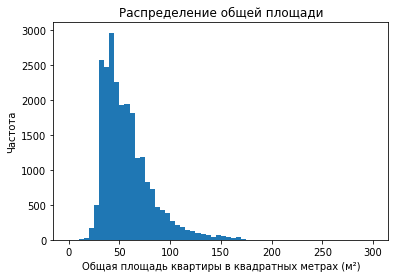

23234
170.0
12.0


In [72]:
import matplotlib.pyplot as plt

# Создание гистограммы общая площдь
plt.hist(data['total_area'], bins=60, range = (0, 300)) 

# Добавление подписей
plt.title('Распределение общей площади')
plt.xlabel('Общая площадь квартиры в квадратных метрах (м²)')
plt.ylabel('Частота')

# Отображение гистограммы
plt.show()

print(data['total_area'].count())
print(data['total_area'].max())
print(data['total_area'].min())

Гистогрмма построена из 23234 значений. Форма распределения общей площади жилья несимметричная, с обрывом слева, с единственным пиком в районе 50 м. Разброс от 12 до 170 метров. Большинство наблюдений имеют площадь в промежутке 25-100 квадратных метров.

##### Изучение параметра жилой площади

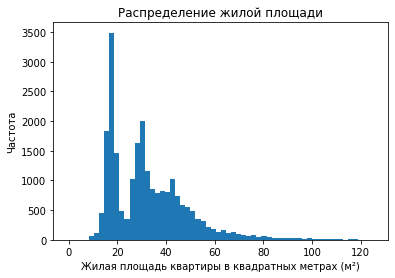

23117
140.0
2.0


In [73]:
# Создание гистограммы жилой площади
plt.hist(data['living_area'], bins=60, range = (0, 125)) 

# Добавление подписей
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь квартиры в квадратных метрах (м²)')
plt.ylabel('Частота')

# Отображение гистограммы
plt.show()

print(data['living_area'].count())
print(data['living_area'].max())
print(data['living_area'].min())

Гистогрмма построена из 23117 значений. Форма распределения жилой площади жилья несимметричная, с обрывом слева, бимодальная, с пиками в районе 17 и 30 м. Разброс от 2 до 140 метров. Большинство наблюдений имеют площадь в промежутке 10-60 квадратных метров.

##### Изучение параметра площади кухни

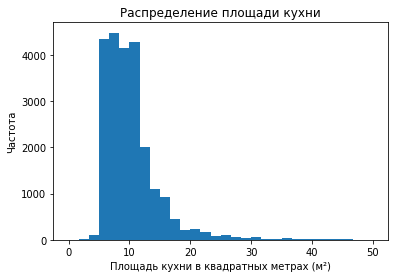

23048
65.0
1.3


In [74]:
# Создание гистограммы площади кухни
plt.hist(data['kitchen_area'], bins=30, range = (0, 50)) 

# Добавление подписей
plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни в квадратных метрах (м²)')
plt.ylabel('Частота')

# Отображение гистограммы
plt.show()

print(data['kitchen_area'].count())
print(data['kitchen_area'].max())
print(data['kitchen_area'].min())

Гистогрмма построена из 23048 значений. Форма распределения жилой площади жилья несимметричная, с обрывом слева, унимодальная, с пиком в районе 10 м. Разброс от 1.3 до 65 метров. Большинство наблюдений имеют площадь в промежутке 5-20 квадратных метров.

##### Изучение параметра цена объекта

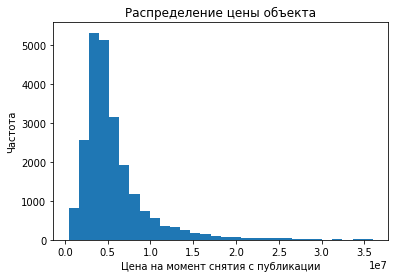

23234
36000000.0
430000.0


In [75]:
# Создание гистограммы 
plt.hist((data['last_price']), bins=30) 

# Добавление подписей
plt.title('Распределение цены объекта')
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Частота')

# Отображение гистограммы
plt.show()

print(data['last_price'].count())
print(data['last_price'].max())
print(data['last_price'].min())

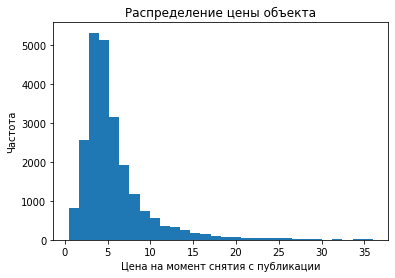

23234
36000000.0
430000.0


In [76]:
# Создание гистограммы
plt.hist((data['last_price'])/1000000, bins=30) 

# Добавление подписей
plt.title('Распределение цены объекта')
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Частота')

# Отображение гистограммы
plt.show()

print(data['last_price'].count())
print(data['last_price'].max())
print(data['last_price'].min())

Гистогрмма построена из 23234 значений. Форма распределения цен на объекты недвижимости несимметричная, с обрывом слева, унимодальная, с пиком в районе 5 млн рублей. Разброс от 430 т.р до 36 млн.р. Большинство наблюдений имеют площадь в промежутке 5-20 квадратных метров.

##### Изучение параметра количество комнат

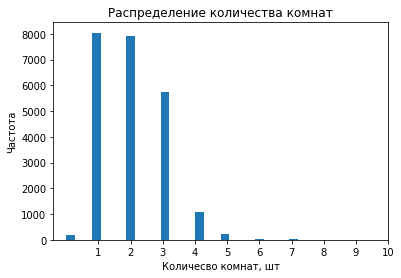

23234
8
0


In [77]:
# Создание гистограммы с количеством комнат
plt.hist(data['rooms'], bins=30)

# Добавление подписей
plt.title('Распределение количества комнат')
plt.xlabel('Количесво комнат, шт')
plt.ylabel('Частота')

# Используем метод set_xticks() для увеличения количества отметок по оси x
plt.xticks(list(range(1, 11)))

# Отображение гистограммы
plt.show()

print(data['rooms'].count())
print(data['rooms'].max())
print(data['rooms'].min())

Для построения диаграммы было использовано 23234 наблюдений, форма распределения не симетричная, с обрывом слева. Разброс от 0 комнат (видимо студия) до 8 (больше 10 мы убрали в предобработке), но основная масса значений в промежутке от 1 до 3 комнат.

##### Изучение параметра высота потолков

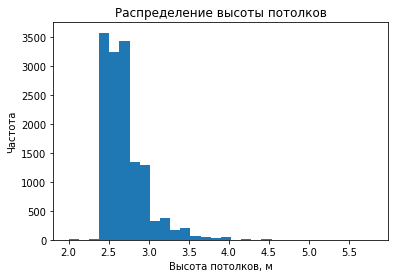

14196
5.8
2.0


In [78]:
# Создание гистограммы с высотой потолков
plt.hist(data['ceiling_height'], bins=30)

# Добавление подписей
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')

# Отображение гистограммы
plt.show()

print(data['ceiling_height'].count())
print(data['ceiling_height'].max())
print(data['ceiling_height'].min())

Для построения диаграммы было использовано 14196 наблюдений, форма распределения не симетричная, с обрывом слева. Разброс от 2 м до 5.8, но основная масса значений в промежутке от 2,5 до 3 метров.

##### Изучение параметра этажа

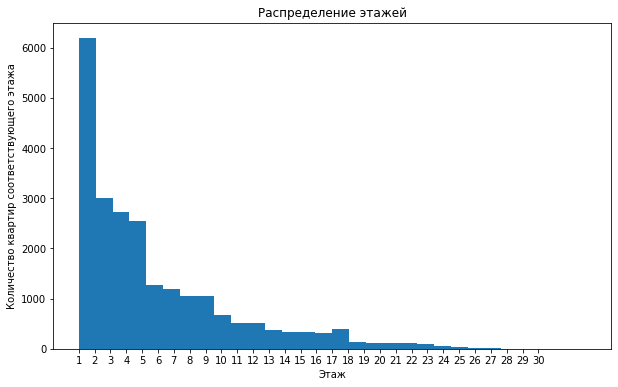

23234
33
1


In [79]:
# Создание гистограммы
plt.figure(figsize=(10, 6))
plt.hist(data['floor'], bins=30)

# Добавление подписей
plt.title('Распределение этажей')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир соответствующего этажа')


# Используем метод set_xticks() для увеличения количества отметок по оси x
plt.xticks(list(range(1, 31)))

# Отображение гистограммы
plt.show()

print(data['floor'].count())
print(data['floor'].max())
print(data['floor'].min())

Для построения диаграммы было использовано 23234 наблюдений, форма распределения не симетричная, с обрывом слева (распределение Пуассона). Разброс от 1 до 33 м, но основная масса значений в промежутке от 1 до 9 этажа. Мода на первый этаж (первый этаж является самым часто встречающимся этажем)

##### Изучение параметра тип этажа

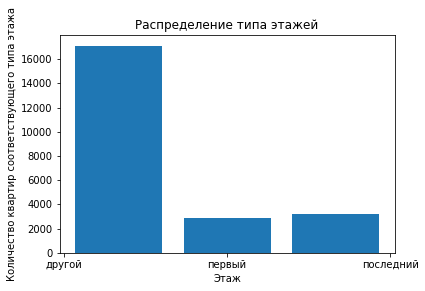

In [80]:
# Создание гистограммы с типами этажей
plt.hist(data['floor_type'], bins = 3, rwidth=0.8)

# Добавление подписей
plt.title('Распределение типа этажей')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир соответствующего типа этажа')


# Отображение гистограммы
plt.show()

Большая часть квартир находится не на первом, и не на последнем этаже, что логично.

##### Изучение параметра количество этажей

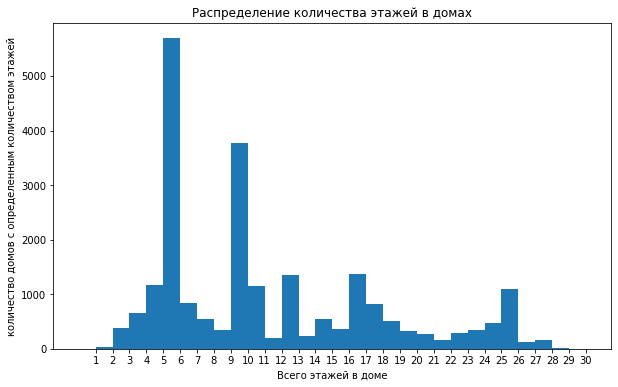

23234
60
1


In [81]:
# Создание гистограммы с количеством этажей
plt.figure(figsize=(10, 6))
plt.hist(data['floors_total'], bins=30, range = (0, 30))

# Добавление подписей
plt.title('Распределение количества этажей в домах')
plt.xlabel('Всего этажей в доме')
plt.ylabel('количество домов с определенным количеством этажей')


# Используем метод set_xticks() для увеличения количества отметок по оси x
plt.xticks(list(range(1, 31)))

# Отображение гистограммы
plt.show()

print(data['floors_total'].count())
print(data['floors_total'].max())
print(data['floors_total'].min())

Для построения диаграммы было использовано 23234 наблюдений, форма распределения не симетричная, Разброс от 1 до 60 этажей, но основная масса значений в промежутке от 1 до 60 этажей. 
Обращает на себя внимание многомодальное распределение. Больше всего недвижимости пятиэтажных и девятиэтажных видов постройки

##### Изучение параметра расстояние до центра

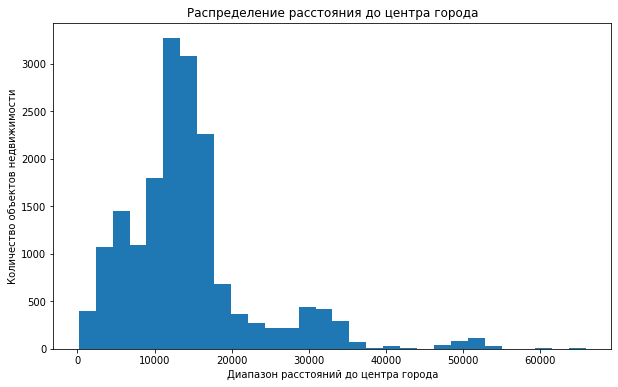

17730
65968.0
181.0


In [82]:
# Создание гистограммы расстояние до центра города в метрах;
plt.figure(figsize=(10, 6))
plt.hist(data['cityCenters_nearest'], bins = 30)

# Добавление подписей
plt.title('Распределение расстояния до центра города')
plt.xlabel('Диапазон расстояний до центра города')
plt.ylabel('Количество объектов недвижимости')

# Отображение гистограммы
plt.show()

print(data['cityCenters_nearest'].count())
print(data['cityCenters_nearest'].max())
print(data['cityCenters_nearest'].min())

Гистограмма построена с использованием 17730 наблюдений, несимметричная, унимодальная. Разброс от 181 метра до 65 км. Основная масса наблюдений сосредоточена в интревале от 0 до 20 км. Мода на уровне 12 км. 

##### Изучение параметра расстояния до аэропорта

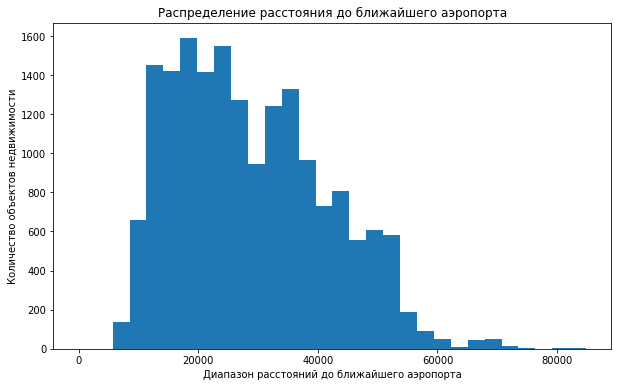

17710
84869.0
0.0


In [83]:
# Создание гистограммы расстояние до ближайшего аэропорта;
plt.figure(figsize=(10, 6))
plt.hist(data['airports_nearest'], bins = 30)

# Добавление подписей
plt.title('Распределение расстояния до ближайшего аэропорта')
plt.xlabel('Диапазон расстояний до ближайшего аэропорта')
plt.ylabel('Количество объектов недвижимости')

# Отображение гистограммы
plt.show()

print(data['airports_nearest'].count())
print(data['airports_nearest'].max())
print(data['airports_nearest'].min())

Для построения диаграммы использованно 17710 значений. Разброс от 0 до 84 км, но основная масса недвижимости располагается на расстроянии 10 - 60 км от аэропорта.  

##### Изучение параметра расстояния до парка

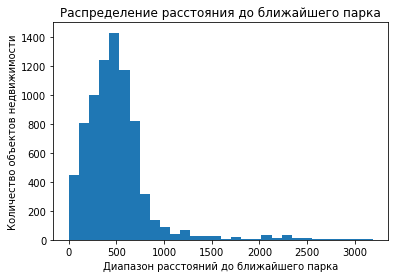

7768
3190.0
1.0


In [84]:
# Создание гистограммы расстояние до ближайшего парка;
plt.hist(data['parks_nearest'], bins = 30)

# Добавление подписей
plt.title('Распределение расстояния до ближайшего парка')
plt.xlabel('Диапазон расстояний до ближайшего парка')
plt.ylabel('Количество объектов недвижимости')

# Отображение гистограммы
plt.show()

print(data['parks_nearest'].count())
print(data['parks_nearest'].max())
print(data['parks_nearest'].min())

Гистограмма содержит 7768 наблюдений, не все готовы точно указать расстрояние до ближайшего парка. Гистограмма не симетричная, разброс значений от 1 м до 3 км, основная масса наблюдений в пределах от 1 м до 1 км. 

##### Изучение параметра количество объявлений по дням и месяцам

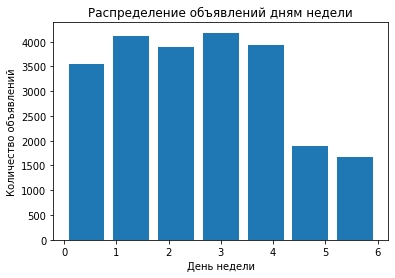

In [85]:
# # Создание гистограммы количества обьявлений по дням недели.

plt.hist(data['weekday'],bins = 7, rwidth=0.8)
# Добавление подписей
plt.title('Распределение объявлений дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')

# Вывод гистограммы
plt.show()


Из диаграммы видно, что в выходные количество публикаций меньше. Примерно в два раза меньше публикаций в выхоной, чем в будний день. Осмелюсь предположить,что видимо чаще размещают объявления риелторы. Если бы у нас была информация о том, собственник разместил объявление или риелтор мы могли бы проверить эту гипотезу. 

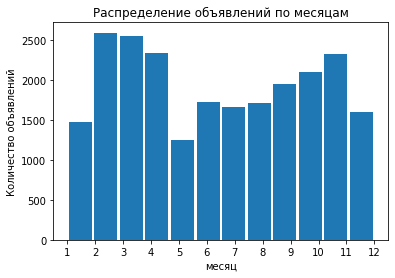

In [86]:
# Создание гистограммы количества обьявлений по месяцам.
plt.hist(data['month'], bins = 12 , rwidth=0.9)

# Используем метод set_xticks() для увеличения количества отметок по оси x
plt.xticks(list(range(1, 13)))

# Добавление подписей
plt.title('Распределение объявлений по месяцам')
plt.xlabel('месяц')
plt.ylabel('Количество объявлений')

# Вывод гистограммы
plt.show()

Распределение объявлений по месяцам показывает, что чаще публикации объявлений делают весной и осенью. Бимодальное распределение. 

Посмотрим сколько вообще объявлений выкладывают каждый день

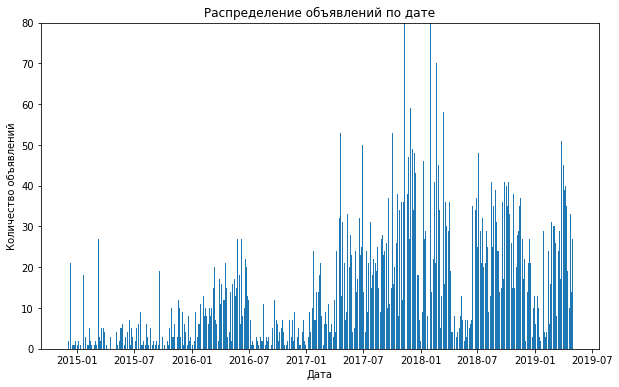

In [87]:
# Группировка данных и подсчет количества объявлений
plt.figure(figsize=(10, 6))
grouped_data = data.groupby('first_day_exposition').size()

# Построение гистограммы
plt.bar(grouped_data.index, grouped_data.values)

# Установка пределов оси y
plt.ylim(0, 80)

# Добавление подписей
plt.title('Распределение объявлений по дате')
plt.xlabel('Дата')
plt.ylabel('Количество объявлений')

# Вывод гистограммы
plt.show()

В целом количество объявлений растет со временем

#### Изучим как быстро продавались квартиры (столбец days_exposition)

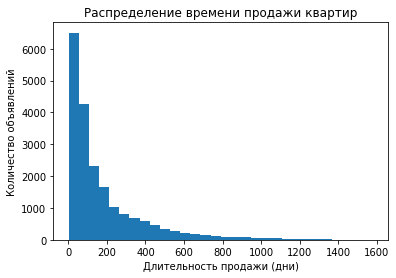

Среднее время продажи: 178.79174930583102 дней
Медианное время продажи: 94.0 дней
Максималное время размещения объявления 1580.0 дней
Минимальное время размещения объявления 1.0 дней


In [88]:
plt.hist(data['days_exposition'], bins = 30)

# Добавление подписей
plt.title('Распределение времени продажи квартир')
plt.xlabel('Длительность продажи (дни)')
plt.ylabel('Количество объявлений')

# Вывод гистограммы
plt.show()

print("Среднее время продажи:", data['days_exposition'].mean(), "дней")
print("Медианное время продажи:", data['days_exposition'].median(), "дней")
print("Максималное время размещения объявления", data['days_exposition'].max(),"дней")
print("Минимальное время размещения объявления", data['days_exposition'].min(),"дней")

Гистограмма выглядит как распределение Пуассона, унимодальное. Из гистограммы можно понять, что полтора месяца, скорее всего будет достаточно для продажи квартиры, но в редких случаях, объявления висят годами. Вероятно время продажи дольше среднего в 3 месяца можно считать необычно долгими, а короче медианы в полтора месяца можно считать быстрыми. 

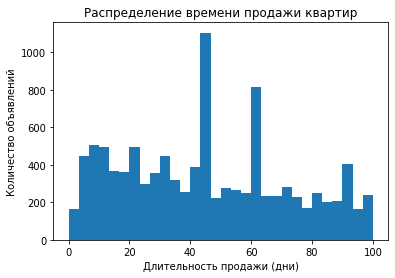

In [89]:
plt.hist(data['days_exposition'], bins = 30, range=(0, 100))

# Добавление подписей
plt.title('Распределение времени продажи квартир')
plt.xlabel('Длительность продажи (дни)')
plt.ylabel('Количество объявлений')

# Вывод гистограммы
plt.show()



Видим два пика, на 45 и 60 дней. Предположу, что в это время риэлторы снимают объявление и выкладывают заново. Может быть потом нужно платить, чтобы объявление продолжало висеть? В любом случае выглядит карайне противоествественно. 🤔

#### Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта

Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

##### Зависит ли цена от общей площади

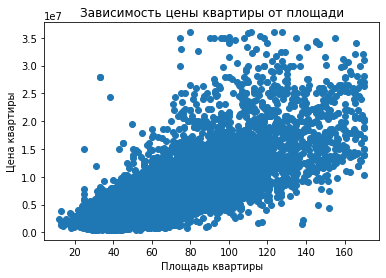

In [90]:
# Построим диаграмму рассеяния 
plt.scatter(data['total_area'], data['last_price'])

# Дадим названия осей
plt.xlabel('Площадь квартиры')
plt.ylabel('Цена квартиры')
plt.title('Зависимость цены квартиры от площади')

# Вывод диаграммы рассеяния
plt.show()

Поскольку обе переменные числовые нам подойдет коэффициент корреляции Пирсона, который измеряет линейную зависимость между двумя переменными.

In [91]:
correlation = data['total_area'].corr(data['last_price'], method='pearson')
print('Коэффициент корреляции Пирсона:', correlation)

Коэффициент корреляции Пирсона: 0.7685169557707383


Такой коэффициент корреляции говорит о средней положительной линейной зависимости между ценой надвижимости и ее площадью.

##### Зависит ли цена от жилой площади


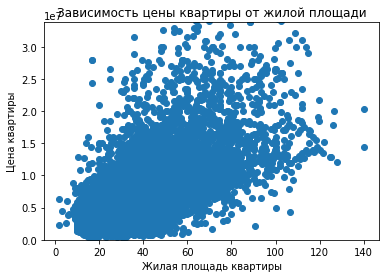

In [92]:
# Построим диаграмму рассеяния 
plt.scatter(data['living_area'], data['last_price'])

# Дадим названия осей
plt.xlabel('Жилая площадь квартиры')
plt.ylabel('Цена квартиры')
plt.title('Зависимость цены квартиры от жилой площади')

# Содержится большое количесвто выбросов,
# ограничим интревал видимости до 99,9%
plt.ylim(0, data['last_price'].quantile(0.999))

# Вывод диаграммы рассеяния
plt.show()

In [93]:
correlation = data['living_area'].corr(data['last_price'], method='pearson')
print('Коэффициент корреляции Пирсона:', correlation)

Коэффициент корреляции Пирсона: 0.6545230492542404


Такой коэффициент корреляции говорит о средней положительной линейной зависимости между ценой надвижимости и ее жилой площадью. Хотя, даже корреляция оказалась ниже чем для общей площади. 

##### Зависит ли цена от площади кухни


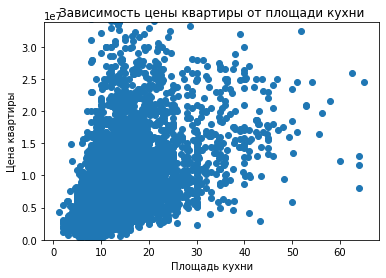

In [94]:
# Построим диаграмму рассеяния 
plt.scatter(data['kitchen_area'], data['last_price'])

# Дадим названия осей
plt.xlabel('Площадь кухни')
plt.ylabel('Цена квартиры')
plt.title('Зависимость цены квартиры от площади кухни')

# Содержится большое количесвто выбросов,
# ограничим интревал видимости до 99,9%
plt.ylim(0, data['last_price'].quantile(0.999))

# Вывод диаграммы рассеяния
plt.show()

In [95]:
correlation = data['living_area'].corr(data['last_price'], method='pearson')
print('Коэффициент корреляции Пирсона:', correlation)

Коэффициент корреляции Пирсона: 0.6545230492542404


Коэффициент корреляции Пирсона равный 0.65 говорит о наличии умеренной положительной зависимости между размером кухни и ценой на жилье. 

##### Зависит ли цена от количества комнат

Для этого исследования диаграмма рассеяния и коэффициент корреляции Пирсона (для чисел) нам не помогут. Попробуем построить ящики с усами для категорий жилья с одной двумя комнатами и тд. Также посчитаем коэффициент корреляции Спирмена, он вычиляется на основе ранговых позиций значений переменных, а не их фактических значений. 

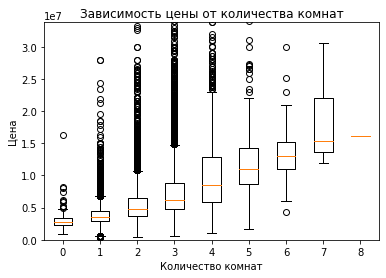

In [96]:
# Группировка данных по количеству комнат и получение значений стоимости
data_grouped = data.groupby('rooms')['last_price'].apply(list)

# Создание списка данных для построения ящика с усами
data_list = data_grouped.values

# Создание списка для ящика с усами
labels = data_grouped.index

# Построение ящика с усами
plt.boxplot(data_list, labels=labels)

plt.ylim(0, data['last_price'].quantile(0.999))

# Настройка подписей осей и заголовка
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.title('Зависимость цены от количества комнат')

# Отображение графика
plt.show()

In [97]:
correlation = data['living_area'].corr(data['last_price'], method='spearman')
print('Коэффициент корреляции Спирмена:', correlation)

Коэффициент корреляции Спирмена: 0.6224591212931708


Коэффициент корреляции Спирмена 0.62 указывает на наличие средней положительной  связи между количеством комнат и ценой квартиры. Это означает, что с увеличением количества комнат вероятно возрастает и цена квартиры. И мы видим это на графике, до 7 комнтат срденяя цена растет, но потом остается стабильной. 

In [98]:
# Разделим недвижимость на 4 категории в зависимости цены  
# и присваиваем в новый столбец 
data['price_category'] = pd.qcut(data['last_price'], q=4, labels=False)

# создаем сводную таблицу по цене и количества комнат
pivot_table_price_category = data[['price_category', 'rooms']].\
pivot_table(index='price_category', columns='rooms', aggfunc=len, fill_value=0)

# вывод таблицы на экран
display(pivot_table_price_category)

rooms,0,1,2,3,4,5,6,7,8
price_category,,,,,,,,,
0,151,3517,1629,563,58,7,0,0,0
1,34,2842,2112,775,118,5,1,0,0
2,7,1310,2227,1889,163,17,1,0,0
3,4,373,1955,2497,733,191,41,13,1


In [99]:
from scipy.stats import chi2_contingency
# Создание кросс-таблицы
cross_table_income_cat = pd.crosstab(data['rooms'], data['price_category'])

# Применение критерия хи-квадрат
chi2, p_value, _, _ = chi2_contingency(cross_table_income_cat)

# Вывод результатов
print(f"Значение критерия хи-квадрат: {chi2}")
print(f"p-значение: {format(p_value, '.10f')}")


Значение критерия хи-квадрат: 6872.546644136843
p-значение: 0.0000000000


p-значение: 0.0000000000. Либо у нас сильная зависимоть, либо какой-то косяк в коде, но какой не могу понять.

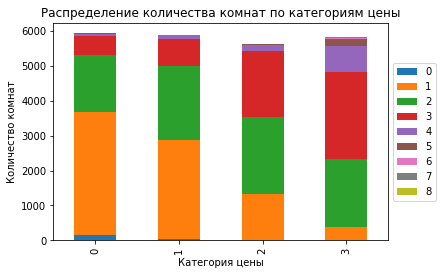

In [100]:
import matplotlib.pyplot as plt

# Создание сводной таблицы
pivot_table = (
    data
    .pivot_table(index='price_category', 
                 columns='rooms', 
                 aggfunc='size', 
                 fill_value=0)
)

# Построение столбчатой диаграммы для каждой категории цены
pivot_table.plot(kind='bar', stacked=True)

# Настройка осей и заголовка
plt.xlabel('Категория цены')
plt.ylabel('Количество комнат')
plt.title('Распределение количества комнат по категориям цены')

# Перемещение легенды за пределы графика
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Отображение графика
plt.show()

Визуализация сводной таблицы подтверждает догадки, чем больше цена, тем больше комнат!

##### Зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой);


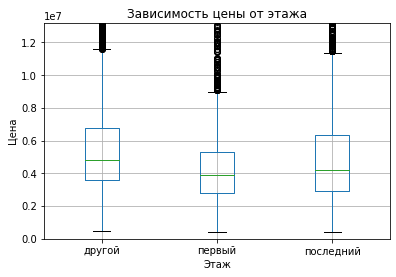

In [101]:
# строим график вида boxplot
ax = data.boxplot(column= 'last_price', by='floor_type')

plt.ylim(0, data['last_price'].quantile(0.95))

# Настройка осей и заголовка
plt.suptitle('') # нужно чтобы избавиться от подзаголовка по умолчнию
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.title('Зависимость цены от этажа')

plt.show()

Квартиры на первом этаже как будто бы чуть дешевле.

In [102]:
from scipy.stats import chi2_contingency
# Создание кросс-таблицы
cross_table = pd.crosstab(data['last_price'], data['floor_type'])

# Применение критерия хи-квадрат
chi2, p_value, _, _ = chi2_contingency(cross_table)

# Вывод результатов
print(f"Значение критерия хи-квадрат: {chi2}")
print(f"p-значение: {p_value}")

Значение критерия хи-квадрат: 5558.265124297813
p-значение: 0.35580850840575


Несмотря на огромное значение хи-квадрат, достоверной разницы похоже, нет, поскольку p -value превышает типичный уровень значимости 0.05.

##### Зависит ли цена от даты размещения (день недели, месяц, год)

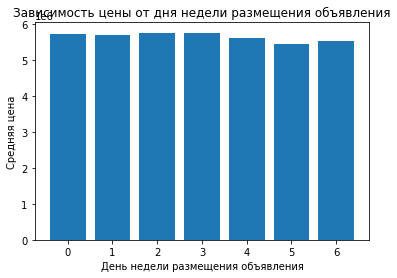

In [103]:
mean_price_by_weekday = data.groupby('weekday')['last_price'].mean()

# Построение барплота
plt.bar(mean_price_by_weekday.index, mean_price_by_weekday.values)

# Настройка осей и заголовка
plt.xlabel('День недели размещения объявления')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от дня недели размещения объявления')

# Отображение графика
plt.show()

Не похоже что есть зависимость, да и было бы странно.

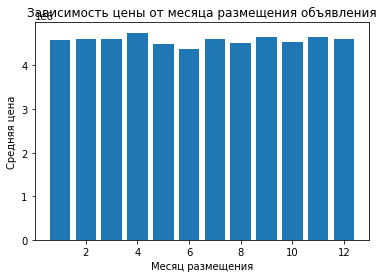

In [104]:
mean_price_by_month = data.groupby('month')['last_price'].median()

# Построение барплота
plt.bar(mean_price_by_month.index, mean_price_by_month.values)

# Настройка осей и заголовка
plt.xlabel('Месяц размещения')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от месяца размещения объявления')

# Отображение графика
plt.show()

Думаю корреляции считать даже не стоит. 

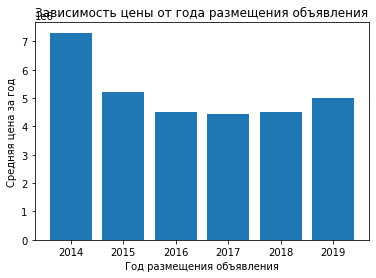

In [105]:
mean_price_by_year = data.groupby('year')['last_price'].median()

# Построение барплота
plt.bar(mean_price_by_year.index, mean_price_by_year.values)

# Настройка осей и заголовка
plt.xlabel('Год размещения объявления')
plt.ylabel('Средняя цена за год')
plt.title('Зависимость цены от года размещения объявления')

# Отображение графика
plt.show()

По графику кажется, что квартиры даже подешевели.

Интересно, а как менялась цена на жилье со временем? Построим гистограмму.

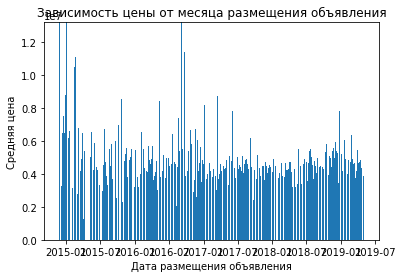

In [106]:
# Группировка данных по месяцу размещения и вычисление средней цены
mean_price_by_first_day = (
    data.groupby('first_day_exposition')['last_price']
    .median()
)

# Построение барплота
plt.bar(mean_price_by_first_day.index, mean_price_by_first_day.values)

# Установка лимита по оси у
plt.ylim(0, data['last_price'].quantile(0.95))

# Настройка осей и заголовка
plt.xlabel('Дата размещения объявления')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от месяца размещения объявления')

# Отображение графика
plt.show()

Выглядит как будто цена на жилье последние 3-5 лет достаточна стабильна.

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23234 entries, 0 to 23698
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23234 non-null  int64         
 1   last_price              23234 non-null  float64       
 2   total_area              23234 non-null  float64       
 3   first_day_exposition    23234 non-null  datetime64[ns]
 4   rooms                   23234 non-null  int64         
 5   ceiling_height          14196 non-null  float64       
 6   floors_total            23234 non-null  int64         
 7   living_area             23117 non-null  float64       
 8   floor                   23234 non-null  int64         
 9   is_apartment            23234 non-null  bool          
 10  studio                  23234 non-null  bool          
 11  open_plan               23234 non-null  bool          
 12  kitchen_area            23048 non-null  float6

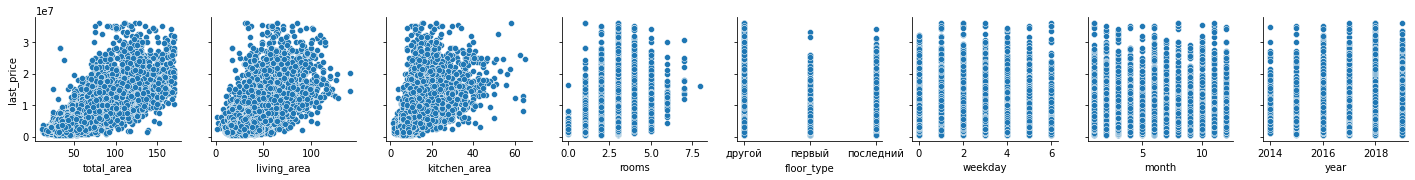

In [123]:
import seaborn as sns

# Выбранные параметры для анализа
parameters = (['total_area', 'living_area', 
               'kitchen_area', 'rooms', 'floor_type', 
               'weekday', 'month', 'year'])

# Создание отдельного датафрейма с ценой и выбранными параметрами
df = data[['last_price'] + parameters]

# Построение графиков зависимости цены от каждого параметра 
# с использованием seaborn.pairplot
my_plt = sns.pairplot(df, x_vars=parameters, y_vars=['last_price'])

# Изменение размера 
# my_plt.fig.set_size_inches(8, 20)
plt.show()


То, что нужно. Единственное, не удалось выставить размер графиков. Все графики строятся на одной строке.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, а так же найдем населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [109]:
# Отфильтруем данные и найдем названия 10 населенных пунктов 
# c наибольшим числом объявлений
top_localities = data['locality_name'].value_counts().head(10).index
print(top_localities)

# Выберем из данных только те из исходного датафрейма,
# в которых значение в столбце 'locality_name' присутствует в списке top_localities
top_localities_data = data[data['locality_name'].isin(top_localities)]


Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')


In [110]:
top_localities_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,mean_living_area,mean_kitchen_area,new_locality_name,price_per_sqm,weekday,month,year,floor_type,cityCenters_nearest_km,price_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,61.524000,16.953846,Санкт-Петербург,120370.370370,3,3,2019,другой,16.0,3
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.600000,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,18.737143,10.765185,поселок Шушары,82920.792079,1,12,2018,первый,19.0,0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.300000,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,34.222680,8.830464,Санкт-Петербург,92785.714286,3,8,2015,другой,14.0,2
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,55.935385,17.300000,Санкт-Петербург,100000.000000,1,6,2018,другой,8.0,3
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.600000,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,16.116250,10.140625,поселок Парголово,99195.710456,3,11,2017,другой,19.0,1
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,42.771429,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,42.771429,11.006667,Санкт-Петербург,110544.692737,3,4,2019,другой,12.0,3
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.430000,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,15.430000,8.810000,поселок Мурино,87454.764777,2,5,2018,другой,NaN,0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,38.075659,9.042033,Санкт-Петербург,88524.590164,6,2,2017,другой,15.0,2
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,18.932353,9.780000,Санкт-Петербург,127525.252525,3,11,2017,другой,14.0,2
14,1,4400000.0,36.00,2016-06-23,1,NaN,6,17.000000,1,False,False,False,8.00,0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,17.670196,8.905391,Пушкин,122222.222222,3,6,2016,первый,31.0,1


In [111]:
average_price_per_sqm = (
    top_localities_data.groupby('locality_name')['price_per_sqm']
    .mean()
)
print(average_price_per_sqm.sort_values(ascending=False))

locality_name
Санкт-Петербург      111213.840184
Пушкин               103047.046342
деревня Кудрово       92473.547576
посёлок Парголово     90332.263023
посёлок Мурино        85752.189195
посёлок Шушары        78677.364217
Колпино               75333.295801
Гатчина               68746.146763
Всеволожск            68654.473986
Выборг                58075.893731
Name: price_per_sqm, dtype: float64


In [112]:
highest_price_locality = (
    data.loc[data['price_per_sqm']
             .idxmax(), 'locality_name']
)
lowest_price_locality = (
    data.loc[data['price_per_sqm']
             .idxmin(), 'locality_name']
)

print("Населённый пункт с самой высокой стоимостью квадратного метра:",
      highest_price_locality)
print("Населённый пункт с самой низкой стоимостью квадратного метра:",
      lowest_price_locality)

Населённый пункт с самой высокой стоимостью квадратного метра: Санкт-Петербург
Населённый пункт с самой низкой стоимостью квадратного метра: посёлок станции Свирь


Кажется Петербург бьет все рекорды

In [113]:
max_locality = average_price_per_sqm.idxmax()
print("Самая высокая стоимость квадратного метра из топ 10: "
      +max_locality)
max_locality = average_price_per_sqm.idxmin()
print("Самая низкая стоимость квадратного метра из топ 10: "
      +max_locality)

Самая высокая стоимость квадратного метра из топ 10: Санкт-Петербург
Самая низкая стоимость квадратного метра из топ 10: Выборг


#### Вычисляем среднюю цену каждого километра квартиры в Санкт-Петербурге 

In [114]:
mean_price_per_km = (
    data
    .loc[data['locality_name'] == 'Санкт-Петербург',
         'last_price'] / 
    data
    .loc[data['locality_name'] == 'Санкт-Петербург',
         'cityCenters_nearest']
    .mean()
)

print("Средняя цена за каждый километр в Санкт-Петербурге: "\
      f"{mean_price_per_km}")

Средняя цена за каждый километр в Санкт-Петербурге: 0        1105.111973
2         441.704755
4         850.086133
7         672.843174
9         459.046512
            ...     
23689     301.780577
23690     467.547373
23691     805.031568
23694     824.583549
23697     975.473837
Name: last_price, Length: 15281, dtype: float64


Мы посчитали среднюю цену за каждый км, она оставляет около 1120 р за каждый км. 
Теперь можно посмотеть график зависимости цены и дальности расположения жилья

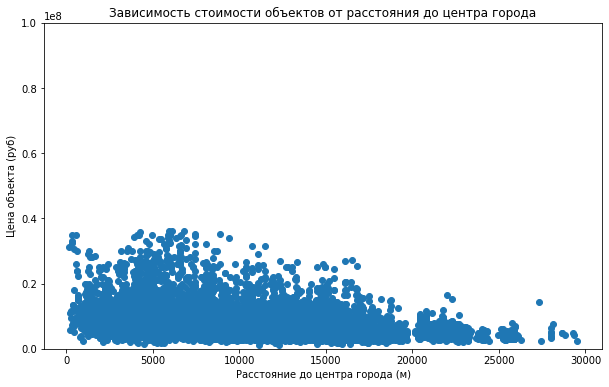

In [115]:
# Создаем график
plt.figure(figsize=(10, 6))
plt.scatter(data
            .query("locality_name == 'Санкт-Петербург'")['cityCenters_nearest'],
            data
            .query("locality_name == 'Санкт-Петербург'")['last_price'])

# Добавляем подписи осей и заголовок
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Цена объекта (руб)')
plt.title('Зависимость стоимости объектов от расстояния до центра города')

# Ограничение по оси y
plt.ylim(0, 100000000)

# Отображаем график
plt.show()

Из графика видно, что дорогие квартиры находятся в центре города, но и дешевого жилья в центре достаточно много. Чем дальше от города, тем меньше и количество объявлений и цены на них. 

In [116]:
pd.set_option('display.max_rows', None)
pivot_table = (
    data.pivot_table(index='cityCenters_nearest_km',
                     values='price_per_sqm',
                     aggfunc=('mean', 'median'))
)
print(pivot_table)

                                 mean         median
cityCenters_nearest_km                              
0.0                     167959.495443  138536.993745
1.0                     145627.294532  125135.746606
2.0                     129673.425227  118867.924528
3.0                     117782.290600  108536.585366
4.0                     126731.649466  116872.427984
5.0                     133487.429417  126280.576587
6.0                     135883.853045  125117.288235
7.0                     136289.231515  122364.786497
8.0                     124026.869288  122093.023256
9.0                     112773.964421  105706.735772
10.0                    112836.887243  106779.877426
11.0                    108387.979712  103563.148598
12.0                    107562.217528  104077.015422
13.0                    108179.737943  104081.632653
14.0                    104227.897458  101864.245168
15.0                    104197.599986  101315.789474
16.0                    100482.235314   97500.

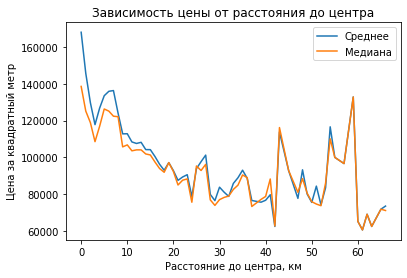

In [117]:
# Построение графика средней цены за квадратный метр
plt.plot(pivot_table.index, pivot_table['mean'], label='Среднее')
# Построение графика медианной цены за квадратный метр
plt.plot(pivot_table.index, pivot_table['median'], label='Медиана')

# Добавление подписей осей и заголовка
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Цена за квадратный метр')
plt.title('Зависимость цены от расстояния до центра')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()


Стало любопытно, где это в 40 - 60 км от Санкт- Петербурга есть элитное жилье

In [118]:
filtered_rows = (data[(data['price_per_sqm'] > 100000) 
                      & (data['cityCenters_nearest_km'].between(40, 60))])

# Вывод отфильтрованных строк
print(filtered_rows['locality_name'].unique())

['Зеленогорск' 'посёлок Репино' 'Кронштадт' 'Петергоф' 'Сестрорецк']


Таким образом, чем дальше от центра, тем меньше будет стоить квартира. С удалением от центра на 20 км стоимость квадратного метра критически падает, от 140 до 80 т р за квадратный метр, тоесть почти в два раза. Интересно, что на удалении от города в 40-60 км имеются поселки с элитной недвижимостью, где снова поднимается цена за квадратный метр примерно до 120 тр. К ним относятся Петергоф, Кронштадт, Сестрорецк и др.

### Общий вывод


Мы обработали данные с сервиса "Яндекс.Недвижимость", которые содержат объявления о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за период с 2015 по 2019 годы.

Нам удалось выяснить, как выглядит средняя квартира в Санкт-Петербурге: это квартира площадью около 50 кв.м, с одной или двумя комнатами, в пяти- или девятиэтажном доме. Такая квартира стоит около 5 млн. руб. и находится примерно в 12 км от центра. Почти всегда вблизи такой квартиры есть парк.

Что касается объявлений о продаже: их общее количество растет, и чаще всего люди решают начать продавать квартиры весной или осенью. Вероятно, объявления размещают риэлторы, поскольку больше всего объявлений выставляется по будням. Если вы решили продать квартиру, то на это обычно уходит около полутора месяцев.

От чего же зависит цена на недвижимость: есть средняя зависимость от общей и жилой площади. Также, существенным фактом является удаление от центра, чем дальше недвижимость, тем в среднем ниже цена, не считая пригородных элитных районов. В целом, цены на жилье за указанный период остаются достаточно стабильными и почти не изменяются. Кроме того, время года, когда продается квартира, не оказывает существенного влияния на цену.

Интересный факт, который нам удалось найти (если анализ данных сделан правильно): чем выше стоимость жилья, тем больше в нем комнат. 

Дополнительную информацию мог бы дать множественный корреляционный анализ, в котором сравнивается влияние нескольких факторов на зависимую переменную (множественная регрессиия), однако, мои навыки ограничены и пока не позволяют этого сделать.
